# **Isomorphism**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## What's isomorphism? Why is it interesting?

As unlabeled graphs can have multiple spatial representations, two graphs are isomorphic if they have the same number of edges, vertices, and same edges connectivity. Let's see an example of two isomorphic graphs, 

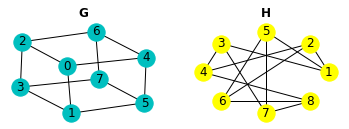

In [2]:
plt.subplot(221)
G = nx.Graph([(0, 1), (0, 4), (0,2), (1, 3), (1, 5), (2, 3), (2, 6), (3, 7), (4, 5), (5, 7), (6, 7), (6, 4)])
nx.draw_spring(G, with_labels = True, node_color = "c")
plt.title("G", fontweight="bold")
H = nx.Graph([(1, 2), (1, 5), (1,3), (2, 4), (2, 6), (3, 4), (3, 7), (4, 8), (5, 6), (6, 8), (7, 8), (7, 5)])
plt.subplot(222)
nx.draw_circular(H, with_labels = True, node_color = "yellow")
plt.title("H", fontweight="bold")

plt.show()

These graphs' spatial representations are very different yet they are isomorphic.  

### **Formal definition**

G and H are isomorphic if we can establish a bijection between the vertex sets of G and H. 

$${\displaystyle f\colon N(G)\to N(H)}$$
such as if $$ $$

<center> $v$  and $ w $ are  adjacent  in G $\iff$ $f(v)$ and $f(w)$ are adjacent in H </center>

To formally prove that 2 graphs are isomorphic we need to find the bijection between the vertex set. For the previous example that would be: 

$$f(i) = i+1 \hspace{0.5cm} \forall i \in [0, 7]$$ 


For small examples, isomorphism may seem easy. But it isn't a simple problem. For two graphs G and H of n nodes, there are n! bijections function possible. Checking every combination is not a feasible option for bigger graphs. 
In fact, isomorphism is part of the problems known as NP. This means that we don't know any algorithm that runs in polynomial time.

### Applications (TODO: Should I move this to the end?)

- Verification of equivalence of different representations of the design of an electronic circuit and communication networks. 
- Image recognition.
- Identification of chemical compounds and proteins.
- Algorithms for fingerprint, facial and retina matching. 
-  Clustering Algorithms on social networks.

## Isomorphism Algorithms
**Naive Approach**

There are some initial properties that we can check to decide whether it's possible to have an isomorphism
- G and H have the same amount of nodes and edges 
- The degree sequence for G and H are the same

These are necessary conditions but don't guarantee that 2 graphs are isomorphic. Let's see a small example:

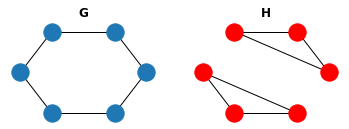

In [3]:
plt.subplot(221)
G = nx.cycle_graph(6)
nx.draw_circular(G)
plt.title("G", fontweight="bold")
plt.subplot(222)
H = nx.union(nx.cycle_graph(3), nx.cycle_graph(3), rename = ("s","d"))
nx.draw_circular(H, node_color = "r")
plt.title("H", fontweight="bold")
plt.show()

In [4]:
nx.faster_could_be_isomorphic(G, H)

True

These graphs are clearly not isomorphic but they have the same degree secuence. 

Another property we can check for is: 
- Same number of cycles of a particular length, for example, triangles. 

In [6]:
nx.fast_could_be_isomorphic(G, H)

False

Checking this new property we can detect that the previous example graphs were not isomorphic. 

We can go one step further and check the number of cliques. 

In [7]:
nx.could_be_isomorphic(G, H)

False

Again we can detect that G and D are not isomorphic. But these conditions are not enough to say that 2 graphs are isomorphic. Let's look at the following example: 

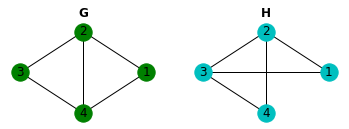

In [8]:
plt.subplot(221)
G = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 1), (2,4)])
nx.draw_circular(G, with_labels = True, node_color="g")
plt.title("G", fontweight="bold")

plt.subplot(222)
H = nx.Graph([(1, 2), (2, 3), (3, 4), (2,4), (3, 1)])
nx.draw_circular(H, with_labels = True, node_color = "c")
plt.title("H", fontweight="bold")
plt.show()

In [10]:
nx.could_be_isomorphic(G, H)

True

These graphs meet all the necessary conditions but they're not isomorphic.

### Some classes of graphs with solution in polynomial time
- Trees
- Planar graphs(In fact, planar graph isomorphism is O(log(n)))
- Interval graphs
- Permutation graphs
- Circulant graphs
- Bounded-parameter graphs
    - Graphs of bounded treewidth
    - Graphs of bounded genus
    - Graphs of bounded degree
    - Graphs with bounded eigenvalue multiplicity
    - k-Contractible graphs (a generalization of bounded degree and bounded genus)

# **Advanced Algorithms**

## **VF2**

This algorithm is used to solve graph isomorphism and sub-graph isomorphism as well. 

VF2 is a recursive algorithm where in each step we extend the current matching function to cover more nodes of both graphs until there are no more nodes to match. This is not a brute-force approach because there are some feasibility rules to avoid exploring the whole recursion tree. 


Formally, We have a function $ M: s -> N(G) \times N(H) $. $M$ is a matching function between the subsets of nodes from $G$ and $H$ at the current state $s$. We start with an initial state $s_0$ with $M(s_0) = \emptyset$. In each step we consider a set of nodes to expand the current state $s$ to the following state $s'$. In this new state $M(s') = M(s) \cup {(g, h)} , g\in N(G), h\in N(H)$. The consistency condition is that the partial graphs $G$ and $H$ associated with $M(s)$ are isomorphic. There are two types of feasibility checks: 
- syntactic (graph structure): consist of checking the consistency condition and also the k-look-ahead rules, for checking in advance if a consistent state $s$ has no consistent successors after k steps.
- semantic(attributes). 

Pseudocode:


Match(s)
    
    Input: Intermediate state
    
    Output: The mapping between the 2 graphs
    
    IF M(s) covers all nodes of H THEN:
        RETURN M(s)
    ELSE:
        Compute P = {(g, h)...} the set of candidates for inclusion in M(s). 
        FOR each p in P:
            IF the feasibility rules succeed for the inclusion of p in M(s) THEN:
                Compute the state of s'
                MATCH(s')
           ENDIF
       ENDFOR
       Restore data structures
   ENDIF

**Time Complexity**


- Best Case $\in \theta(n²)$
- Wost Case $\in \theta(n!n)$

## State of the art 
- VF2++ and VF2 Plus. They include some optimizations over the algorithm VF2. 
- There are some new algorithms: QuickSI, GraphQL, TurboISO, BoostISO, CFL-Match, VF3, CECI, and DAF. 

# References(TODO: check formatting)
- Graph Theory and Its applications
- https://www.ijcaonline.org/archives/volume162/number7/somkunwar-2017-ijca-913414.pdf
- A (Sub)Graph Isomorphism Algorithm for Matching Large Graphs(paper)
- https://en.wikipedia.org/wiki/Graph_isomorphism_problem